# Tuning Practice of ML (SVM, RF, XGBoost)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
cols=['X','Y','temp','RH','wind','rain','area']

In [6]:
np.corrcoef(np.array(df[cols]).T)

array([[ 1.        ,  0.53954817, -0.05125826,  0.08522319,  0.01879782,
         0.06538717,  0.0633853 ],
       [ 0.53954817,  1.        , -0.02410308,  0.06222073, -0.02034085,
         0.0332341 ,  0.04487323],
       [-0.05125826, -0.02410308,  1.        , -0.52739034, -0.22711622,
         0.06949055,  0.09784411],
       [ 0.08522319,  0.06222073, -0.52739034,  1.        ,  0.06941007,
         0.09975122, -0.07551856],
       [ 0.01879782, -0.02034085, -0.22711622,  0.06941007,  1.        ,
         0.06111888,  0.01231728],
       [ 0.06538717,  0.0332341 ,  0.06949055,  0.09975122,  0.06111888,
         1.        , -0.00736573],
       [ 0.0633853 ,  0.04487323,  0.09784411, -0.07551856,  0.01231728,
        -0.00736573,  1.        ]])

<AxesSubplot:xlabel='month', ylabel='area'>

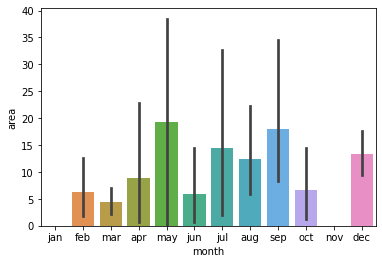

In [7]:
sns.barplot(x='month', y='area', data=df,order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])

<AxesSubplot:xlabel='day', ylabel='area'>

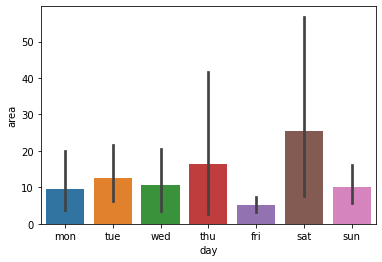

In [8]:
sns.barplot(x='day', y='area', data=df,order=['mon','tue','wed','thu','fri','sat','sun'])

## Modeling

In [9]:
X,y = np.array(df[["X","Y","wind","temp","RH","rain"]]), np.array(df["area"])

In [10]:
np.random.seed(1)
train_idx=np.random.choice(517,414,replace=False)
test_idx = np.array(list(set(range(517))-set(train_idx)))

In [11]:
X_train = X[train_idx,]
y_train = y[train_idx,]

X_test = X[test_idx,]
y_test = y[test_idx,]

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(414, 6)
(103, 6)
(414,)
(103,)


### 0. Base (mean of y_train)

In [13]:
np.sqrt(np.mean((y_test-np.mean(y_train))**2)) #base (y_mean)

39.590538800986764

### 1. Ordinary Least Squares

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
ols_regr = LinearRegression()
ols_regr.fit(X_train,y_train)

LinearRegression()

In [16]:
ols_pred = ols_regr.predict(X_test)

In [17]:
ols_pred[ols_pred<0,]=0
ols_pred

array([12.5392075 ,  0.        ,  0.        , 22.86630035, 19.22258636,
       12.18265086, 20.45069653, 23.55373232,  6.31037111,  9.97562266,
        4.59648089, 14.81480927, 11.50656004, 11.56083497, 12.52963491,
       15.82084389, 21.9901982 , 22.10018358,  0.        , 12.18023111,
        7.43648839,  0.        , 11.40372353, 14.04203276, 10.26398739,
        0.        ,  3.45775966,  5.17998072, 12.2606301 ,  1.8257471 ,
       20.19338614, 15.29575398,  8.7835219 , 20.59061087,  8.59703137,
        6.95391865,  9.65544782, 19.14369229,  1.60390458, 25.36587798,
       13.68622693,  2.73784258, 14.36082101, 24.58711594,  2.16241137,
        2.68220753, 12.01539354, 16.18952219, 20.60823898, 12.25075903,
       12.25192308, 18.77709929, 14.86329477,  5.24675169,  5.24675169,
        0.        ,  9.82027064,  0.        , 21.2646094 , 13.87930093,
        2.09016542, 26.76906414, 18.95612088, 16.79304783, 22.3445618 ,
       13.9818977 ,  6.9061387 , 17.65770751, 16.75444541,  6.99

In [18]:
np.sqrt(np.mean((y_test-ols_pred)**2))

39.968369858070886

In [19]:
ols_regr.coef_

array([ 1.45549894,  1.59831088,  1.41048415,  1.17445595, -0.17433927,
       -3.40673666])

### 2. RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf_regr = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=2, n_jobs=-1, random_state=0)

In [22]:
rf_regr.fit(X_train,y_train)

RandomForestRegressor(max_features=2, n_estimators=500, n_jobs=-1,
                      random_state=0)

In [23]:
rf_pred = rf_regr.predict(X_test)

In [24]:
rf_pred[rf_pred<0,]=0
rf_pred

array([  3.90768   ,  10.69790333,   2.86541   ,   6.43664   ,
        10.10318   ,   8.3162    ,   4.95328   ,  70.89267   ,
         8.16162   ,   4.66616   ,  14.71809   ,  14.20354   ,
         9.54934667,   2.50818   ,   9.23508   ,   9.50886   ,
        14.68166   ,  19.65586   ,  42.43626   ,  28.60506   ,
        34.36      ,   4.916558  ,   3.61928   ,   4.40128   ,
         2.66486   ,   3.551644  ,   7.75726   ,   3.0081    ,
         6.51162667,   4.24146   ,   3.54404   ,  12.39542   ,
         5.83446   ,  14.61362   ,   5.46874   ,  12.67034   ,
         6.64664   ,   3.92684   ,   4.62076   ,  20.05369333,
        18.14686   ,   2.87738   ,  13.54702   ,   4.04722   ,
        21.9328    ,   2.82426   ,  45.43222   ,  15.49206   ,
         3.62272   ,   7.98212   ,   6.50808   ,  13.91982   ,
         9.91174   ,  20.01168   ,  20.01168   ,   6.72319333,
         6.47068   ,   6.81910133,   2.47896   ,   9.51992   ,
        13.3758    , 111.57491667,  12.43632   ,  11.74

In [25]:
np.sqrt(np.mean((y_test-rf_pred)**2))

44.306771067179525

In [26]:
# 튜닝

param_grid = {'n_estimators':[500,1000,1500,2000],
             'max_features':[1,2,3,4,5,6]}

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_regr,param_grid,cv=5,scoring='neg_root_mean_squared_error')

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=2, n_estimators=500,
                                             n_jobs=-1, random_state=0),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [500, 1000, 1500, 2000]},
             scoring='neg_root_mean_squared_error')

In [29]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 1000}

In [30]:
grid_search.best_score_

-60.06067653367994

In [31]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.785376,2.205785,0.097330,0.005124,1,500,"{'max_features': 1, 'n_estimators': 500}",-80.701532,-120.974253,-28.971621,-41.860092,-34.929122,-61.487324,34.801488,22
1,1.185809,0.029650,0.196974,0.028571,1,1000,"{'max_features': 1, 'n_estimators': 1000}",-80.521173,-120.992679,-28.525524,-40.812035,-34.876771,-61.145636,34.999029,14
2,1.898916,0.125490,0.298997,0.030896,1,1500,"{'max_features': 1, 'n_estimators': 1500}",-80.614486,-120.989393,-28.556277,-40.950933,-35.346399,-61.291497,34.916179,16
3,2.490170,0.145652,0.366586,0.018738,1,2000,"{'max_features': 1, 'n_estimators': 2000}",-80.527912,-120.980330,-28.795006,-40.603300,-35.731831,-61.327676,34.842818,17
4,0.702794,0.038537,0.095526,0.011222,2,500,"{'max_features': 2, 'n_estimators': 500}",-79.956396,-121.186121,-29.287390,-34.928405,-35.299730,-60.131608,35.563648,3


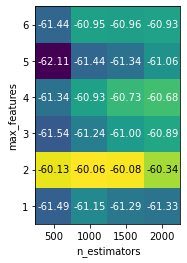

In [32]:
import mglearn

scores=np.array(results.mean_test_score).reshape(6,4)

mglearn.tools.heatmap(scores,xlabel='n_estimators', xticklabels=param_grid['n_estimators'], ylabel='max_features',yticklabels=param_grid['max_features'],cmap='viridis')

In [33]:
rft_pred = grid_search.predict(X_test)

In [34]:
rft_pred[rft_pred<0,]=0
rft_pred

array([  3.65525   ,  10.42159333,   2.79986333,   6.42975   ,
         9.60544   ,   8.29722   ,   5.30477333,  72.75286833,
         8.22702   ,   4.22794   ,  14.823275  ,  15.06821   ,
         9.852065  ,   2.40903   ,   8.25121   ,   9.3284    ,
        13.933594  ,  21.43822   ,  44.59116   ,  33.02769333,
        35.79455   ,   5.32738133,   3.88799   ,   3.81706   ,
         2.77329   ,   3.415742  ,   8.3404    ,   3.14898   ,
         6.05816   ,   3.91856   ,   3.69501   ,  11.47985   ,
         6.27289   ,  13.92114   ,   6.01153   ,  12.12865   ,
         7.57917   ,   3.45125   ,   4.4906    ,  26.60305667,
        19.14862   ,   2.44684   ,  12.97778   ,   4.10291467,
        23.14547   ,   2.59013   ,  41.73864   ,  15.49178   ,
         3.9669    ,   8.3752    ,   6.08548   ,  14.5168    ,
         9.666016  ,  20.31607   ,  20.31607   ,   6.62225333,
         8.10389   ,   7.36881067,   2.76798   ,   9.57288   ,
        15.0139    , 117.78208833,  13.32312   ,  12.52

In [35]:
np.sqrt(np.mean((y_test-rft_pred)**2))

44.70334439868336

### 3. SVM (RBF kernel)

In [36]:
from sklearn.svm import SVR

In [37]:
#Implement normalization for svm
Xn_train = X_train-np.min(X_train,axis=0)
Xn_train = Xn_train/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

Xn_test = X_test-np.min(X_train,axis=0)
Xn_test = Xn_test/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

In [38]:
svm_regr = SVR(kernel='rbf',C=2**-3, gamma=2**3)

In [39]:
svm_regr.fit(Xn_train,y_train)

SVR(C=0.125, gamma=8)

In [40]:
svm_pred = svm_regr.predict(Xn_test)

In [41]:
svm_pred[svm_pred<0,]=0
svm_pred

array([0.90471427, 1.00602932, 0.99647449, 1.01291886, 1.02323108,
       1.27048332, 1.04433045, 0.84068559, 1.46917357, 0.45848201,
       0.48819462, 1.16631598, 0.83380159, 0.39828356, 0.17726965,
       0.52208216, 1.319635  , 1.10132128, 0.80306134, 1.02889471,
       0.86352681, 0.80509149, 0.42560598, 0.19149432, 0.11516732,
       0.57489639, 1.08233165, 0.65902943, 0.65101219, 0.46219589,
       0.94801961, 0.53827712, 1.01594495, 1.70970706, 0.93465433,
       1.01060593, 0.81613969, 0.94067204, 1.43387548, 1.00634123,
       0.043831  , 0.49767695, 1.26745372, 1.17331104, 0.6832127 ,
       1.10314363, 0.4269433 , 1.17748147, 0.83528857, 0.49987273,
       0.63318211, 1.1056897 , 0.88846851, 1.22378682, 1.22378682,
       1.18077761, 1.25967228, 1.17525482, 0.89315732, 1.4949497 ,
       0.84450373, 0.9363435 , 0.27791448, 0.24150986, 0.74731424,
       0.93280848, 0.35807908, 0.95535757, 0.37362109, 0.68846243,
       0.20696603, 0.2785115 , 1.483808  , 1.21817165, 0.73306

In [42]:
np.sqrt(np.mean((y_test-svm_pred)**2))

40.900412505947735

In [43]:
# 튜닝

param_grid = {'C':[2**4.75,2**5,2**5.25,2**5.5,2**5.75],
             'gamma':[2**6.25,2**6.5,2**6.75,2**7,2**7.25]} #coarse tuning -> fine tuning

In [67]:
param_grid_visual = {'C':list(np.round(np.array([2**4.75,2**5,2**5.25,2**5.5,2**5.75]),3)),
             'gamma':list(np.round(np.array([2**6.25,2**6.5,2**6.75,2**7,2**7.25]),3))} #for visualization later

In [44]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm_regr,param_grid,cv=5,scoring='neg_root_mean_squared_error')

In [45]:
grid_search.fit(Xn_train,y_train)

GridSearchCV(cv=5, estimator=SVR(C=0.125, gamma=8),
             param_grid={'C': [26.908685288118864, 32, 38.05462768008707,
                               45.254833995939045, 53.81737057623773],
                         'gamma': [76.10925536017415, 90.50966799187809,
                                   107.63474115247546, 128,
                                   152.2185107203483]},
             scoring='neg_root_mean_squared_error')

In [46]:
grid_search.best_params_

{'C': 38.05462768008707, 'gamma': 76.10925536017415}

In [48]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018988,0.002528,0.005002,1.094442e-03,26.908685,76.109255,"{'C': 26.908685288118864, 'gamma': 76.10925536...",-85.202148,-120.426979,-26.820995,-24.048597,-23.288857,-55.957515,39.864564,16
1,0.019584,0.000486,0.004602,4.848425e-04,26.908685,90.509668,"{'C': 26.908685288118864, 'gamma': 90.50966799...",-85.321729,-120.386541,-26.850596,-23.983633,-23.270146,-55.962529,39.878220,18
2,0.021987,0.000632,0.003998,5.840039e-07,26.908685,107.634741,"{'C': 26.908685288118864, 'gamma': 107.6347411...",-85.429978,-120.343093,-26.897300,-23.913669,-23.258896,-55.968587,39.886418,19
3,0.024178,0.000395,0.004402,4.945157e-04,26.908685,128,"{'C': 26.908685288118864, 'gamma': 128}",-85.519433,-120.291202,-26.945169,-23.843551,-23.247859,-55.969443,39.889031,20
4,0.032376,0.006212,0.005602,1.750374e-03,26.908685,152.218511,"{'C': 26.908685288118864, 'gamma': 152.2185107...",-85.586588,-120.234170,-26.982438,-23.777792,-23.231358,-55.962469,39.888498,17


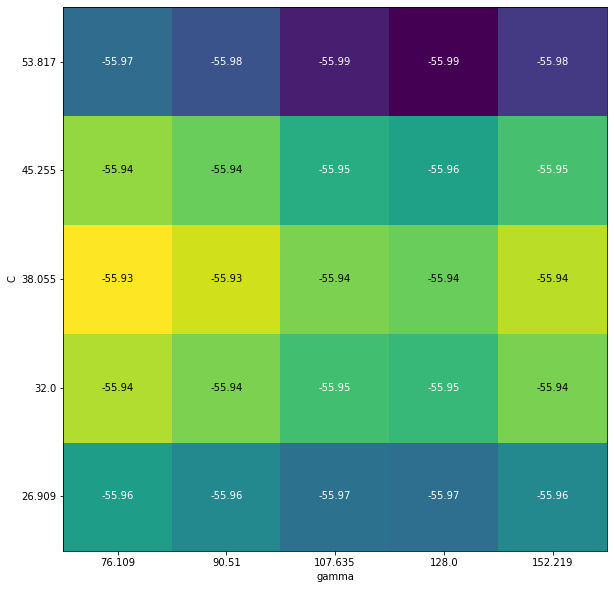

In [68]:
import mglearn

%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

scores=np.array(results.mean_test_score).reshape(5,5)

mglearn.tools.heatmap(scores,xlabel='gamma', xticklabels=param_grid_visual['gamma'], ylabel='C',yticklabels=param_grid_visual['C'],cmap='viridis')

In [69]:
svmt_pred = grid_search.predict(Xn_test)

In [70]:
svmt_pred[svmt_pred<0,]=0
svmt_pred

array([3.89955616e+00, 6.31029333e+00, 5.99503626e+00, 3.69855942e+00,
       2.02105296e+01, 7.49786266e+00, 1.58958275e+00, 5.07116571e+00,
       8.86583951e+00, 2.95705703e+00, 8.58271393e+00, 9.91036840e+00,
       0.00000000e+00, 3.78722165e+00, 0.00000000e+00, 1.86399195e+00,
       5.91644605e+00, 3.27243576e+00, 7.68730729e+00, 5.06910328e+00,
       7.45941009e+00, 6.14081042e+00, 3.94793706e+00, 4.80611517e+00,
       0.00000000e+00, 5.93558978e+00, 6.22173706e+00, 5.95241675e+00,
       5.31547730e+00, 4.39806829e+00, 3.21121189e+00, 4.24324809e+00,
       3.25386528e+00, 3.21614789e+00, 4.71487066e+00, 4.37246684e+00,
       8.15756958e+00, 2.11935903e+00, 4.51006118e+00, 5.25831498e+00,
       2.85599381e+01, 1.47472620e+00, 6.27904163e+00, 4.23723053e-02,
       2.05230399e+00, 5.93140477e+00, 2.02615152e+01, 6.60632687e+00,
       8.55719189e+00, 2.21914946e+00, 5.38660503e+00, 7.10055729e+00,
       1.23593592e+01, 2.19296973e+01, 2.19296973e+01, 5.97377820e+00,
      

In [71]:
np.sqrt(np.mean((y_test-svmt_pred)**2))

40.425152310564165

### 4. XGBoost

In [73]:
!pip install xgboost

In [74]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [75]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50): #find the best n_estimators
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #print the best n_estimators
    print("n_estimators:", cvresult.shape[0])

In [76]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor
xgb_regr = xgb.XGBRegressor( #just arbitrary xgboost
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

In [79]:
#make new format of train set for xgboost
train=df.iloc[train_idx,]
train.reset_index(drop=True,inplace=True)
print(train.head())

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0  2  2   aug  tue  92.1  152.6  658.2  14.3  21.8  56   3.1   0.0   0.52
1  6  5   aug  sat  90.2   96.9  624.2   8.9  14.7  59   5.8   0.0   0.00
2  4  6   sep  thu  93.7   80.9  685.2  17.9  17.6  42   3.1   0.0   0.00
3  3  4   sep  fri  93.3  141.2  713.9  13.9  18.6  49   3.6   0.0  35.88
4  7  4   sep  wed  90.1   82.9  735.7   6.2  15.4  57   4.5   0.0  37.71


In [80]:
#make new format of test set for xgboost
test=df.iloc[test_idx,]
test.reset_index(drop=True,inplace=True)
print(test.head())

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
1  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
2  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
3  6  5   sep  fri  93.3  141.2  713.9  13.9  22.9  44   5.4   0.0   0.0
4  7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.0


In [81]:
target = 'area'
predictors = ["X","Y","wind","temp","RH","rain"]

In [82]:
xgb_regr.fit(train[predictors],train[target])
xgb_pred=xgb_regr.predict(test[predictors])

In [83]:
np.sqrt(np.mean((y_test-xgb_pred)**2)) #not tuned xgboost

94.73871699024137

In [84]:
# find the best n_estimators given other parameters are fixed
modelfit(xgb_regr,train,predictors) # 1 is too small, we can increase the learning_rate

n_estimators: 1


In [85]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1_regr = xgb.XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

In [86]:
modelfit(xgb1_regr,train,predictors) #ok. we select this n_estimators.

n_estimators: 37


Choose the parameters in the order of (max_depth,min_child_weight) -> (gamma) -> (n_estimators) -> (subsample,colsample_bytree) -> (reg_alpha,reg_lambda) -> (n_estimators)  ((( optional : -> (learning_rate, n_estimators) ))) 

In [87]:
param_test1={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=37, max_depth=5, min_child_weight=1,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test1, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [88]:
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_ #note that it's already 56 ! The best performance of SVM was 55.93, of RF was 60.06. 

({'max_depth': 7, 'min_child_weight': 5}, -56.02301483434967)

In [89]:
param_test2={
    'min_child_weight':[3,5,7,9,11,13,15,17,19,21]
}

gsearch2 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=37, max_depth=7, min_child_weight=1,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test2, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [90]:
gsearch2.fit(train[predictors],train[target])
gsearch2.best_params_, gsearch2.best_score_

({'min_child_weight': 15}, -55.76562851105839)

In [91]:
param_test3={
    'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
}

gsearch3 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=37, max_depth=7, min_child_weight=15,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test3, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [92]:
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.3}, -55.765625655909595)

In [93]:
xgb2_regr = xgb.XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=7,
    min_child_weight=15,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

modelfit(xgb2_regr, train, predictors)

n_estimators: 42


In [94]:
param_test4 = {
    'subsample': [0.6,0.7,0.8,0.9],  #[i/10.0 for i in range(6,10)],
    'colsample_bytree': [0.6,0.7,0.8,0.9]  #[1/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=42, max_depth=7, min_child_weight=15,
                                              gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test4, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [95]:
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, -55.68311098343096)

In [96]:
param_test5 = {
    'subsample': [0.7,0.75,0.8,0.85,0.9],  #[i/10.0 for i in range(6,10)],
    'colsample_bytree': [0.8,0.85,0.9,0.95,1]  #[1/10.0 for i in range(6,10)]
}

gsearch5 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=42, max_depth=7, min_child_weight=15,
                                              gamma=0.3, subsample=0.8, colsample_bytree=0.9,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test5, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [97]:
gsearch5.fit(train[predictors],train[target])
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.85, 'subsample': 0.8}, -55.68311098343096)

In [98]:
param_test6 = {
    'reg_alpha': [0.005,0.01,0.02,0.05],  #[i/10.0 for i in range(6,10)],
    'reg_lambda': [10**-7,10**-6,10**-5,10**-4,10**-3]  #[1/10.0 for i in range(6,10)]
}

gsearch6 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=42, max_depth=7, min_child_weight=15,
                                              gamma=0.3, subsample=0.8, colsample_bytree=0.9,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test6, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [99]:
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0.01, 'reg_lambda': 1e-06}, -55.65397206879766)

In [100]:
xgb3_regr = xgb.XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=7,
    min_child_weight=15,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    reg_alpha=0.01,
    reg_lambda=10**-6,
    seed=1
    )

modelfit(xgb3_regr, train, predictors)

n_estimators: 46


In [101]:
xgb4_regr = xgb.XGBRegressor(
    learning_rate=0.02,
    n_estimators=1000,
    max_depth=7,
    min_child_weight=15,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    reg_alpha=0.01,
    reg_lambda=10**-6,
    seed=1
    )

modelfit(xgb4_regr, train, predictors)

n_estimators: 18


In [102]:
param_test7 = {
    'learning_rate': [0.005,0.01,0.02],  #[i/10.0 for i in range(6,10)],
    'n_estimators': [18,46,89]  #[1/10.0 for i in range(6,10)]
}

gsearch7 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=5, max_depth=7, min_child_weight=15,
                                              gamma=0.3, subsample=0.8, colsample_bytree=0.9,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1,reg_alpha=0.01,
                                               reg_lambda=10**-6, seed=1),
                       param_grid = param_test7, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [103]:
gsearch7.fit(train[predictors],train[target])
gsearch7.best_params_, gsearch7.best_score_

({'learning_rate': 0.01, 'n_estimators': 46}, -55.64963607256725)

In [104]:
xgbt_regr = xgb.XGBRegressor(
    learning_rate=0.01,
    n_estimators=46,
    max_depth=7,
    min_child_weight=15,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    reg_alpha=0.01,
    reg_lambda=10**-6,
    seed=1
    )

In [105]:
xgbt_regr.fit(train[predictors],train[target])
xgbt_pred=xgbt_regr.predict(test[predictors])

In [106]:
xgbt_pred

array([ 3.0180979,  3.577935 ,  2.4866655,  2.948749 ,  3.400522 ,
        3.1897247,  4.9539013, 17.009241 ,  3.0490654,  2.9285686,
        3.3205633,  4.0906773,  5.3551817,  4.9829464,  2.1435077,
        3.8335695,  4.9744463,  4.8128066,  5.4169207, 19.541767 ,
        6.5943837,  2.1218498,  1.731364 ,  9.288298 ,  1.6131312,
        1.7965729,  1.505385 ,  1.400155 ,  5.191183 ,  4.6888843,
        1.3915389,  3.9521277,  2.466811 , 15.39504  ,  2.2841794,
        3.2001216,  3.802073 ,  1.882374 ,  2.6420152,  3.4833074,
        7.674549 ,  1.4987941,  3.2575886,  3.4953473,  5.440016 ,
        1.5336863,  4.823927 ,  4.7291794,  2.3922539,  3.3875937,
        3.2115114,  4.514327 ,  3.407075 ,  4.3285303,  4.3285303,
        2.3574953,  5.9988775,  2.803961 ,  1.7105207,  3.293053 ,
        1.7391751, 10.127837 ,  6.639465 ,  4.271304 ,  2.9926188,
        3.4619606,  2.2906263,  3.5106976,  3.0389917,  2.9641411,
       10.427482 ,  2.3798056,  3.0734928,  4.535181 ,  2.2770

In [107]:
np.sqrt(np.mean((y_test-xgbt_pred)**2)) #Note that initial performance(not tuned) of xgboost was 94. and it is comparable to SVM(40.43).

40.44555974929067